In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from wordcloud import WordCloud,ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LinearRegression, Lasso,LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [12]:
df = pd.read_csv('/Users/rahulkosamkar/Documents/Data_Science/Projects/data_analyst_ salary_prediction/DataAnalyst.csv')

In [13]:
df.head(10)

Unnamed: 0                                          Job Title  \
0           0  Data Analyst, Center on Immigration and Justic...   
1           1                               Quality Data Analyst   
2           2  Senior Data Analyst, Insights & Analytics Team...   
3           3                                       Data Analyst   
4           4                             Reporting Data Analyst   
5           5                                       Data Analyst   
6           6                       Business/Data Analyst (FP&A)   
7           7                               Data Science Analyst   
8           8                                       Data Analyst   
9           9                      Data Analyst, Merchant Health   

              Salary Estimate  \
0  $37K-$66K (Glassdoor est.)   
1  $37K-$66K (Glassdoor est.)   
2  $37K-$66K (Glassdoor est.)   
3  $37K-$66K (Glassdoor est.)   
4  $37K-$66K (Glassdoor est.)   
5  $37K-$66K (Glassdoor est.)   
6  $37K-$66K (Glassdoor est.)   
7  $37K-$66K (Glassdoor est.)   
8  $37K-$66K (Glassdoor est.)   
9  $37K-$66K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Are you eager to roll up your sleeves and harn...     3.2   
1  Overview\n\nProvides analytical and technical ...     3.8   
2  We’re looking for a Senior Data Analyst who ha...     3.4   
3  Requisition NumberRR-0001939\nRemote:Yes\nWe c...     4.1   
4  ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...     3.9   
5  About Cubist\nCubist Systematic Strategies is ...     3.9   
6  Two Sigma is a different kind of investment ma...     4.4   
7  Data Science Analyst\n\nJob Details\nLevel\nEx...     3.7   
8  The Data Analyst is an integral member of the ...     4.0   
9  About Us\n\nRiskified is the AI platform power...     4.4   

                              Company Name      Location  \
0           Vera Institute of Justice\n3.2  New York, NY   
1  Visiting Nurse Service of New York\n3.8  New York, NY   
2                         Squarespace\n3.4  New York, NY   
3                            Celerity\n4.1  New York, NY   
4                             FanDuel\n3.9  New York, NY   
5                             Point72\n3.9  New York, NY   
6                           Two Sigma\n4.4  New York, NY   
7             GNY Insurance Companies\n3.7  New York, NY   
8                                DMGT\n4.0  New York, NY   
9                           Riskified\n4.4  New York, NY   

             Headquarters                     Size  Founded  \
0            New York, NY     201 to 500 employees     1961   
1            New York, NY         10000+ employees     1893   
2            New York, NY   1001 to 5000 employees     2003   
3              McLean, VA     201 to 500 employees     2002   
4            New York, NY    501 to 1000 employees     2009   
5            Stamford, CT   1001 to 5000 employees     2014   
6            New York, NY   1001 to 5000 employees     2001   
7            New York, NY     201 to 500 employees     1914   
8  London, United Kingdom  5001 to 10000 employees     1896   
9            New York, NY    501 to 1000 employees     2013   

                Type of ownership                               Industry  \
0          Nonprofit Organization                      Social Assistance   
1          Nonprofit Organization       Health Care Services & Hospitals   
2               Company - Private                               Internet   
3  Subsidiary or Business Segment                            IT Services   
4               Company - Private                    Sports & Recreation   
5               Company - Private  Investment Banking & Asset Management   
6               Company - Private  Investment Banking & Asset Management   
7               Company - Private                     Insurance Carriers   
8                Company - Public       Venture Capital & Private Equity   
9               Company - Private                 Research & Developme

# Data Cleaning

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [15]:
df.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [16]:
df.describe()

Unnamed: 0       Rating      Founded
count   2253.0000  2253.000000  2253.000000
mean    1126.0000     3.160630  1398.522858
std      650.5294     1.665228   901.929251
min        0.0000    -1.000000    -1.000000
25%      563.0000     3.100000    -1.000000
50%     1126.0000     3.600000  1979.000000
75%     1689.0000     4.000000  2002.000000
max     2252.0000     5.000000  2019.000000

In [17]:
df['Salary Estimate'].value_counts()

$42K-$76K (Glassdoor est.)    57
$41K-$78K (Glassdoor est.)    57
$50K-$86K (Glassdoor est.)    41
$35K-$67K (Glassdoor est.)    33
$43K-$76K (Glassdoor est.)    31
                              ..
$47K-$81K (Glassdoor est.)     3
$43K-$77K (Glassdoor est.)     3
$36K-$67K (Glassdoor est.)     3
$57K-$70K (Glassdoor est.)     2
-1                             1
Name: Salary Estimate, Length: 90, dtype: int64

In [18]:
df['Salary Estimate'].shape

(2253,)

In [19]:
df = df[df['Salary Estimate'] != '-1']
df['Salary Estimate'].shape

(2252,)

In [20]:
df.dropna(inplace = True)
df.head(10)

Unnamed: 0                                          Job Title  \
0           0  Data Analyst, Center on Immigration and Justic...   
1           1                               Quality Data Analyst   
2           2  Senior Data Analyst, Insights & Analytics Team...   
3           3                                       Data Analyst   
4           4                             Reporting Data Analyst   
5           5                                       Data Analyst   
6           6                       Business/Data Analyst (FP&A)   
7           7                               Data Science Analyst   
8           8                                       Data Analyst   
9           9                      Data Analyst, Merchant Health   

              Salary Estimate  \
0  $37K-$66K (Glassdoor est.)   
1  $37K-$66K (Glassdoor est.)   
2  $37K-$66K (Glassdoor est.)   
3  $37K-$66K (Glassdoor est.)   
4  $37K-$66K (Glassdoor est.)   
5  $37K-$66K (Glassdoor est.)   
6  $37K-$66K (Glassdoor est.)   
7  $37K-$66K (Glassdoor est.)   
8  $37K-$66K (Glassdoor est.)   
9  $37K-$66K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Are you eager to roll up your sleeves and harn...     3.2   
1  Overview\n\nProvides analytical and technical ...     3.8   
2  We’re looking for a Senior Data Analyst who ha...     3.4   
3  Requisition NumberRR-0001939\nRemote:Yes\nWe c...     4.1   
4  ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...     3.9   
5  About Cubist\nCubist Systematic Strategies is ...     3.9   
6  Two Sigma is a different kind of investment ma...     4.4   
7  Data Science Analyst\n\nJob Details\nLevel\nEx...     3.7   
8  The Data Analyst is an integral member of the ...     4.0   
9  About Us\n\nRiskified is the AI platform power...     4.4   

                              Company Name      Location  \
0           Vera Institute of Justice\n3.2  New York, NY   
1  Visiting Nurse Service of New York\n3.8  New York, NY   
2                         Squarespace\n3.4  New York, NY   
3                            Celerity\n4.1  New York, NY   
4                             FanDuel\n3.9  New York, NY   
5                             Point72\n3.9  New York, NY   
6                           Two Sigma\n4.4  New York, NY   
7             GNY Insurance Companies\n3.7  New York, NY   
8                                DMGT\n4.0  New York, NY   
9                           Riskified\n4.4  New York, NY   

             Headquarters                     Size  Founded  \
0            New York, NY     201 to 500 employees     1961   
1            New York, NY         10000+ employees     1893   
2            New York, NY   1001 to 5000 employees     2003   
3              McLean, VA     201 to 500 employees     2002   
4            New York, NY    501 to 1000 employees     2009   
5            Stamford, CT   1001 to 5000 employees     2014   
6            New York, NY   1001 to 5000 employees     2001   
7            New York, NY     201 to 500 employees     1914   
8  London, United Kingdom  5001 to 10000 employees     1896   
9            New York, NY    501 to 1000 employees     2013   

                Type of ownership                               Industry  \
0          Nonprofit Organization                      Social Assistance   
1          Nonprofit Organization       Health Care Services & Hospitals   
2               Company - Private                               Internet   
3  Subsidiary or Business Segment                            IT Services   
4               Company - Private                    Sports & Recreation   
5               Company - Private  Investment Banking & Asset Management   
6               Company - Private  Investment Banking & Asset Management   
7               Company - Private                     Insurance Carriers   
8                Company - Public       Venture Capital & Private Equity   
9               Company - Private                 Research & Developme

In [21]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

In [22]:
df.drop(columns = ['Unnamed: 0','Easy Apply'],axis = 1, inplace = True)

### Salary Parsing

In [23]:
df['Salary Estimate'].value_counts()

$42K-$76K (Glassdoor est.)    57
$41K-$78K (Glassdoor est.)    57
$50K-$86K (Glassdoor est.)    41
$35K-$67K (Glassdoor est.)    33
$43K-$76K (Glassdoor est.)    31
                              ..
$31K-$59K (Glassdoor est.)     4
$47K-$81K (Glassdoor est.)     3
$43K-$77K (Glassdoor est.)     3
$36K-$67K (Glassdoor est.)     3
$57K-$70K (Glassdoor est.)     2
Name: Salary Estimate, Length: 89, dtype: int64

In [24]:
df['Salary Estimate'].dropna(inplace = True)
df['Salary Estimate'].value_counts()

$42K-$76K (Glassdoor est.)    57
$41K-$78K (Glassdoor est.)    57
$50K-$86K (Glassdoor est.)    41
$35K-$67K (Glassdoor est.)    33
$43K-$76K (Glassdoor est.)    31
                              ..
$31K-$59K (Glassdoor est.)     4
$47K-$81K (Glassdoor est.)     3
$43K-$77K (Glassdoor est.)     3
$36K-$67K (Glassdoor est.)     3
$57K-$70K (Glassdoor est.)     2
Name: Salary Estimate, Length: 89, dtype: int64

In [25]:
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.split('(')[0])
print(df['Salary Estimate'])

0        $37K-$66K 
1        $37K-$66K 
2        $37K-$66K 
3        $37K-$66K 
4        $37K-$66K 
           ...     
2248    $78K-$104K 
2249    $78K-$104K 
2250    $78K-$104K 
2251    $78K-$104K 
2252    $78K-$104K 
Name: Salary Estimate, Length: 2251, dtype: object


In [26]:
df['Salary Estimate'].str.split('-')

0        [$37K, $66K ]
1        [$37K, $66K ]
2        [$37K, $66K ]
3        [$37K, $66K ]
4        [$37K, $66K ]
             ...      
2248    [$78K, $104K ]
2249    [$78K, $104K ]
2250    [$78K, $104K ]
2251    [$78K, $104K ]
2252    [$78K, $104K ]
Name: Salary Estimate, Length: 2251, dtype: object

In [27]:
# Replacing the '$' and 'k'
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x : x.replace('K','').replace('$',''))
df['Salary Estimate']

0        37-66 
1        37-66 
2        37-66 
3        37-66 
4        37-66 
         ...   
2248    78-104 
2249    78-104 
2250    78-104 
2251    78-104 
2252    78-104 
Name: Salary Estimate, Length: 2251, dtype: object

In [28]:
df

Job Title Salary Estimate  \
0     Data Analyst, Center on Immigration and Justic...          37-66    
1                                  Quality Data Analyst          37-66    
2     Senior Data Analyst, Insights & Analytics Team...          37-66    
3                                          Data Analyst          37-66    
4                                Reporting Data Analyst          37-66    
...                                                 ...             ...   
2248  RQS - IHHA - 201900004460 -1q Data Security An...         78-104    
2249              Senior Data Analyst (Corporate Audit)         78-104    
2250  Technical Business Analyst (SQL, Data analytic...         78-104    
2251                Data Analyst 3, Customer Experience         78-104    
2252                        Senior Quality Data Analyst         78-104    

                                        Job Description  Rating  \
0     Are you eager to roll up your sleeves and harn...     3.2   
1     Overview\n\nProvides analytical and technical ...     3.8   
2     We’re looking for a Senior Data Analyst who ha...     3.4   
3     Requisition NumberRR-0001939\nRemote:Yes\nWe c...     4.1   
4     ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...     3.9   
...                                                 ...     ...   
2248  Maintains systems to protect data from unautho...     2.5   
2249  Position:\nSenior Data Analyst (Corporate Audi...     2.9   
2250  Title: Technical Business Analyst (SQL, Data a...    -1.0   
2251  Summary\n\nResponsible for working cross-funct...     3.1   
2252  You.\n\nYou bring your body, mind, heart and s...     3.4   

                                 Company Name        Location  \
0              Vera Institute of Justice\n3.2    New York, NY   
1     Visiting Nurse Service of New York\n3.8    New York, NY   
2                            Squarespace\n3.4    New York, NY   
3                               Celerity\n4.1    New York, NY   
4                                FanDuel\n3.9    New York, NY   
...                                       ...             ...   
2248                       Avacend, Inc.\n2.5      Denver, CO   
2249                   Arrow Electronics\n2.9  Centennial, CO   
2250                                 Spiceorb      Denver, CO   
2251         Contingent Network Services\n3.1  Centennial, CO   
2252                          SCL Health\n3.4  Broomfield, CO   

          Headquarters                    Size  Founded  \
0         New York, NY    201 to 500 employees     1961   
1         New York, NY        10000+ employees     1893   
2         New York, NY  1001 to 5000 employees     2003   
3           McLean, VA    201 to 500 employees     2002   
4         New York, NY   501 to 1000 employees     2009   
...                ...                     ...      ...   
2248    Alpharetta, GA     51 to 200 employees       -1   
2249    Centennial, CO        10000+ employees     1935   
2250                -1                      -1       -1   
2251  West Chester, OH    201 to 500 employees     1984   
2252    Broomfield, CO        10000+ employees     1864   

                   Type of ownership                                 Industry  \
0             Nonprofit Organization                        Social Assistance   
1             Nonprofit Organization         Health Care Services & Hospitals   
2                  Company - Private                                 Internet   
3     Subsidiary or Business Segment                              IT Services   
4                  Company - Private                      Sports & Recreation   
...                              ...                                      ...   
2248               Company - Private                   Staffing & Outsourcing   
2249                Company - Public                                Wholesale   
2250                              -1                                       -1   
2251               Company - Private  En

In [29]:
df['Salary Estimate'].describe()

count       2251
unique        89
top       41-78 
freq          57
Name: Salary Estimate, dtype: object

In [30]:
df['Salary Estimate'].value_counts()

41-78      57
42-76      57
50-86      41
35-67      33
60-124     31
           ..
31-59       4
47-81       3
36-67       3
43-77       3
57-70       2
Name: Salary Estimate, Length: 89, dtype: int64

In [31]:
df['Min Salary'] = df['Salary Estimate'].apply(lambda x : x.split('-')[0])
df['Min Salary'].head(3)

0    37
1    37
2    37
Name: Min Salary, dtype: object

In [32]:
df['Max Salary'] = df['Salary Estimate'].apply(lambda x : x.split('-')[1])
df['Max Salary'].head(5)

0    66 
1    66 
2    66 
3    66 
4    66 
Name: Max Salary, dtype: object

In [33]:
# Changing the Data type from Object to Integer
df[['Min Salary','Max Salary']] = df[['Min Salary','Max Salary']].apply(pd.to_numeric)
df['Min Salary'].dtype

dtype('int64')

In [34]:
df['Average Salary'] = (df['Min Salary']+df['Max Salary'])/2
df['Average Salary'] = df['Average Salary'].astype('int64')
df['Average Salary'].dtype

dtype('int64')

In [35]:
df['Company Name'] = df['Company Name'].str.slice(stop=-4)

In [36]:
df.head(10)

Job Title Salary Estimate  \
0  Data Analyst, Center on Immigration and Justic...          37-66    
1                               Quality Data Analyst          37-66    
2  Senior Data Analyst, Insights & Analytics Team...          37-66    
3                                       Data Analyst          37-66    
4                             Reporting Data Analyst          37-66    
5                                       Data Analyst          37-66    
6                       Business/Data Analyst (FP&A)          37-66    
7                               Data Science Analyst          37-66    
8                                       Data Analyst          37-66    
9                      Data Analyst, Merchant Health          37-66    

                                     Job Description  Rating  \
0  Are you eager to roll up your sleeves and harn...     3.2   
1  Overview\n\nProvides analytical and technical ...     3.8   
2  We’re looking for a Senior Data Analyst who ha...     3.4   
3  Requisition NumberRR-0001939\nRemote:Yes\nWe c...     4.1   
4  ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...     3.9   
5  About Cubist\nCubist Systematic Strategies is ...     3.9   
6  Two Sigma is a different kind of investment ma...     4.4   
7  Data Science Analyst\n\nJob Details\nLevel\nEx...     3.7   
8  The Data Analyst is an integral member of the ...     4.0   
9  About Us\n\nRiskified is the AI platform power...     4.4   

                         Company Name      Location            Headquarters  \
0           Vera Institute of Justice  New York, NY            New York, NY   
1  Visiting Nurse Service of New York  New York, NY            New York, NY   
2                         Squarespace  New York, NY            New York, NY   
3                            Celerity  New York, NY              McLean, VA   
4                             FanDuel  New York, NY            New York, NY   
5                             Point72  New York, NY            Stamford, CT   
6                           Two Sigma  New York, NY            New York, NY   
7             GNY Insurance Companies  New York, NY            New York, NY   
8                                DMGT  New York, NY  London, United Kingdom   
9                           Riskified  New York, NY            New York, NY   

                      Size  Founded               Type of ownership  \
0     201 to 500 employees     1961          Nonprofit Organization   
1         10000+ employees     1893          Nonprofit Organization   
2   1001 to 5000 employees     2003               Company - Private   
3     201 to 500 employees     2002  Subsidiary or Business Segment   
4    501 to 1000 employees     2009               Company - Private   
5   1001 to 5000 employees     2014               Company - Private   
6   1001 to 5000 employees     2001               Company - Private   
7     201 to 500 employees     1914               Company - Private   
8  5001 to 10000 employees     1896                Company - Public   
9    501 to 1000 employees     2013               Company - Private   

                                Industry                            Sector  \
0                      Social Assistance                        Non-Profit   
1       Health Care Services & Hospitals                       Health Care   
2                               Internet            Information Technology   
3                            IT Services            Information Technology   
4                    Sports & Recreation  Arts, Entertainment & Recreation   
5  Investment Banking & Asset Management                           Finance   
6  Investment Banking & Asset Management                           Finance   
7                     Insurance Carriers                         Insurance   
8       Venture Capital & Private Equity                           Finance   
9                 Research & Development                 Business Services   

                      Revenue     

In [37]:
df['State'] = df['Location'].str.slice(start=-3)
df['State']

0        NY
1        NY
2        NY
3        NY
4        NY
       ... 
2248     CO
2249     CO
2250     CO
2251     CO
2252     CO
Name: State, Length: 2251, dtype: object

In [38]:
df['Location'] = df['Location'].str.slice(stop=-4)
df['Location']

0         New York
1         New York
2         New York
3         New York
4         New York
           ...    
2248        Denver
2249    Centennial
2250        Denver
2251    Centennial
2252    Broomfield
Name: Location, Length: 2251, dtype: object

In [39]:
df['State'].value_counts()

 CA    626
 TX    394
 NY    345
 IL    164
 PA    114
 AZ     97
 CO     96
 NC     89
 NJ     86
 WA     53
 VA     48
 OH     35
 UT     33
 FL     27
 IN     23
 DE     11
 GA      4
 SC      3
 KS      3
Name: State, dtype: int64

In [40]:
df['Location'].value_counts()

New York         310
Chicago          130
San Francisco    119
Austin            81
Los Angeles       80
                ... 
Millbrae           1
Southlake          1
Staten Island      1
Conshohocken       1
Monterey Park      1
Name: Location, Length: 249, dtype: int64

In [41]:
df['HQ_State'] = df['Headquarters'].str.slice(start =-3)
df['HQ_State']

0        NY
1        NY
2        NY
3        VA
4        NY
       ... 
2248     GA
2249     CO
2250     -1
2251     OH
2252     CO
Name: HQ_State, Length: 2251, dtype: object

In [42]:
df['HQ_State'] = df['HQ_State'].replace('-1','Nan')
df['HQ_State']

0        NY
1        NY
2        NY
3        VA
4        NY
       ... 
2248     GA
2249     CO
2250    Nan
2251     OH
2252     CO
Name: HQ_State, Length: 2251, dtype: object

In [43]:
df['Headquarters'] = df['Headquarters'].str.slice(stop=-4)

In [44]:
df['Same_State'] = df.apply(lambda x : 1 if x.HQ_State==x.State  else 0, axis = 1)

In [45]:
df

Job Title Salary Estimate  \
0     Data Analyst, Center on Immigration and Justic...          37-66    
1                                  Quality Data Analyst          37-66    
2     Senior Data Analyst, Insights & Analytics Team...          37-66    
3                                          Data Analyst          37-66    
4                                Reporting Data Analyst          37-66    
...                                                 ...             ...   
2248  RQS - IHHA - 201900004460 -1q Data Security An...         78-104    
2249              Senior Data Analyst (Corporate Audit)         78-104    
2250  Technical Business Analyst (SQL, Data analytic...         78-104    
2251                Data Analyst 3, Customer Experience         78-104    
2252                        Senior Quality Data Analyst         78-104    

                                        Job Description  Rating  \
0     Are you eager to roll up your sleeves and harn...     3.2   
1     Overview\n\nProvides analytical and technical ...     3.8   
2     We’re looking for a Senior Data Analyst who ha...     3.4   
3     Requisition NumberRR-0001939\nRemote:Yes\nWe c...     4.1   
4     ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...     3.9   
...                                                 ...     ...   
2248  Maintains systems to protect data from unautho...     2.5   
2249  Position:\nSenior Data Analyst (Corporate Audi...     2.9   
2250  Title: Technical Business Analyst (SQL, Data a...    -1.0   
2251  Summary\n\nResponsible for working cross-funct...     3.1   
2252  You.\n\nYou bring your body, mind, heart and s...     3.4   

                            Company Name    Location  Headquarters  \
0              Vera Institute of Justice    New York      New York   
1     Visiting Nurse Service of New York    New York      New York   
2                            Squarespace    New York      New York   
3                               Celerity    New York        McLean   
4                                FanDuel    New York      New York   
...                                  ...         ...           ...   
2248                       Avacend, Inc.      Denver    Alpharetta   
2249                   Arrow Electronics  Centennial    Centennial   
2250                                Spic      Denver                 
2251         Contingent Network Services  Centennial  West Chester   
2252                          SCL Health  Broomfield    Broomfield   

                        Size  Founded               Type of ownership  \
0       201 to 500 employees     1961          Nonprofit Organization   
1           10000+ employees     1893          Nonprofit Organization   
2     1001 to 5000 employees     2003               Company - Private   
3       201 to 500 employees     2002  Subsidiary or Business Segment   
4      501 to 1000 employees     2009               Company - Private   
...                      ...      ...                             ...   
2248     51 to 200 employees       -1               Company - Private   
2249        10000+ employees     1935                Company - Public   
2250                      -1       -1                              -1   
2251    201 to 500 employees     1984               Company - Private   
2252        10000+ employees     1864          Nonprofit Organization   

                                     Industry  \
0                           Social Assistance   
1            Health Care Services & Hospitals   
2                                    Internet   
3                                 IT Services   
4                         Sports & Recreation   
...                                       ...   
2248                   Staffing & Outsourcing   
2249                                Wholesale   
2250                                       -1   
2251  Enterprise Software & Network Solutions   
2252         Health Care Services & Hospitals   

                                S

In [46]:
df['Same_State'].value_counts()

0    1304
1     947
Name: Same_State, dtype: int64

In [47]:
df['Founded'].value_counts()

-1       659
 2008     80
 1996     54
 2000     54
 2002     54
        ... 
 1924      1
 1922      1
 1918      1
 1908      1
 1682      1
Name: Founded, Length: 161, dtype: int64

In [48]:
df['Founded']= df['Founded'].replace(-1,'Nan')
df['Founded'].value_counts()

Nan     659
2008     80
1996     54
2000     54
2002     54
       ... 
1909      1
1865      1
1893      1
1917      1
1789      1
Name: Founded, Length: 161, dtype: int64

In [49]:
df

Job Title Salary Estimate  \
0     Data Analyst, Center on Immigration and Justic...          37-66    
1                                  Quality Data Analyst          37-66    
2     Senior Data Analyst, Insights & Analytics Team...          37-66    
3                                          Data Analyst          37-66    
4                                Reporting Data Analyst          37-66    
...                                                 ...             ...   
2248  RQS - IHHA - 201900004460 -1q Data Security An...         78-104    
2249              Senior Data Analyst (Corporate Audit)         78-104    
2250  Technical Business Analyst (SQL, Data analytic...         78-104    
2251                Data Analyst 3, Customer Experience         78-104    
2252                        Senior Quality Data Analyst         78-104    

                                        Job Description  Rating  \
0     Are you eager to roll up your sleeves and harn...     3.2   
1     Overview\n\nProvides analytical and technical ...     3.8   
2     We’re looking for a Senior Data Analyst who ha...     3.4   
3     Requisition NumberRR-0001939\nRemote:Yes\nWe c...     4.1   
4     ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...     3.9   
...                                                 ...     ...   
2248  Maintains systems to protect data from unautho...     2.5   
2249  Position:\nSenior Data Analyst (Corporate Audi...     2.9   
2250  Title: Technical Business Analyst (SQL, Data a...    -1.0   
2251  Summary\n\nResponsible for working cross-funct...     3.1   
2252  You.\n\nYou bring your body, mind, heart and s...     3.4   

                            Company Name    Location  Headquarters  \
0              Vera Institute of Justice    New York      New York   
1     Visiting Nurse Service of New York    New York      New York   
2                            Squarespace    New York      New York   
3                               Celerity    New York        McLean   
4                                FanDuel    New York      New York   
...                                  ...         ...           ...   
2248                       Avacend, Inc.      Denver    Alpharetta   
2249                   Arrow Electronics  Centennial    Centennial   
2250                                Spic      Denver                 
2251         Contingent Network Services  Centennial  West Chester   
2252                          SCL Health  Broomfield    Broomfield   

                        Size Founded               Type of ownership  \
0       201 to 500 employees    1961          Nonprofit Organization   
1           10000+ employees    1893          Nonprofit Organization   
2     1001 to 5000 employees    2003               Company - Private   
3       201 to 500 employees    2002  Subsidiary or Business Segment   
4      501 to 1000 employees    2009               Company - Private   
...                      ...     ...                             ...   
2248     51 to 200 employees     Nan               Company - Private   
2249        10000+ employees    1935                Company - Public   
2250                      -1     Nan                              -1   
2251    201 to 500 employees    1984               Company - Private   
2252        10000+ employees    1864          Nonprofit Organization   

                                     Industry  \
0                           Social Assistance   
1            Health Care Services & Hospitals   
2                                    Internet   
3                                 IT Services   
4                         Sports & Recreation   
...                                       ...   
2248                   Staffing & Outsourcing   
2249                                Wholesale   
2250                                       -1   
2251  Enterprise Software & Network Solutions   
2252         Health Care Services & Hospitals   

                                Sector       

In [50]:
df['Job Title'].value_counts()

Data Analyst                                                            404
Senior Data Analyst                                                      90
Junior Data Analyst                                                      30
Business Data Analyst                                                    28
Sr. Data Analyst                                                         21
                                                                       ... 
Data Science - Analyst/Associate - Security Incident Response Team        1
Data Analyst - Denver, CO                                                 1
Senior Quality Data Analyst                                               1
Business Analytics Analyst II (Data Concierge)                            1
Data Analyst/Data Acquisition Speciliest with Financial Industry Exp      1
Name: Job Title, Length: 1271, dtype: int64

In [51]:
def job_title(title):
    if 'data analyst' in title.lower():
        return 'data analyst'
    elif 'business data analyst' in title.lower():
        return 'bda'
    elif 'machine learning' in title.lower():
        return 'mda'
    elif 'data scientist'in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'de'
    elif 'manager' in title.lower():
        return'manager'
    else:
        return 'nan'
def seniortiy(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead'in title.lower() or 'sr.' in title.lower():
        return 'senior'
    elif 'jr'in title.lower() or 'junior' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'nan'

In [52]:
df['Jobs'] = df['Job Title'].apply(job_title)
df['Jobs'].value_counts()

data analyst      1670
nan                550
data scientist      14
de                  11
manager              6
Name: Jobs, dtype: int64

In [53]:
df['Senior_Jobs'] = df['Job Title'].apply(seniortiy)
df['Senior_Jobs'].value_counts()

nan       1704
senior     474
junior      73
Name: Senior_Jobs, dtype: int64

In [54]:
#Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [55]:
df['Desc_len'] = df['Job Description'].apply(lambda x : len(x))

In [56]:
df.describe()

Rating   Min Salary   Max Salary  Average Salary   Same_State  \
count  2251.000000  2251.000000  2251.000000     2251.000000  2251.000000   
mean      3.161928    54.267437    89.975122       71.886717     0.420702   
std       1.663451    19.579706    29.321502       23.640682     0.493781   
min      -1.000000    24.000000    38.000000       33.000000     0.000000   
25%       3.100000    41.000000    70.000000       58.000000     0.000000   
50%       3.600000    50.000000    87.000000       69.000000     0.000000   
75%       4.000000    64.000000   104.000000       80.000000     1.000000   
max       5.000000   113.000000   190.000000      150.000000     1.000000   

          num_comp      Desc_len  
count  2251.000000   2251.000000  
mean      0.609507   3120.365615  
std       1.148479   1858.823549  
min       0.000000      5.000000  
25%       0.000000   1760.500000  
50%       0.000000   2883.000000  
75%       0.000000   4119.000000  
max       4.000000  18664.000000

Text(0.5, 0, 'Average Salary')

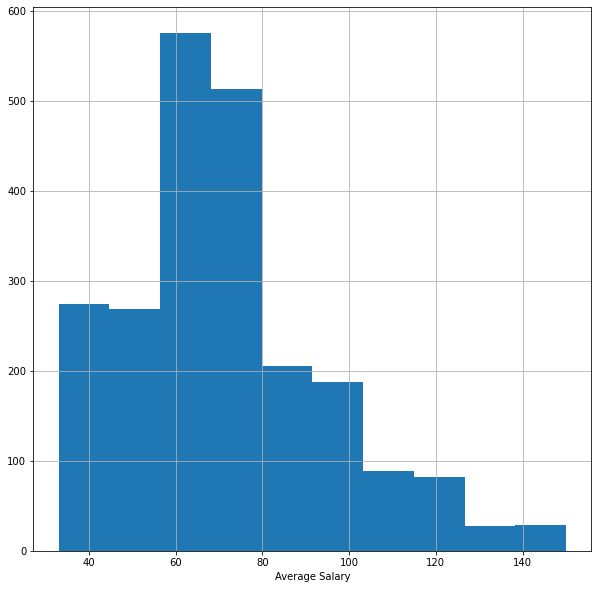

In [57]:
plt.figure(figsize=(10,10))
df['Average Salary'].hist()
plt.xlabel('Average Salary')

Text(0, 0.5, 'No. of Description')

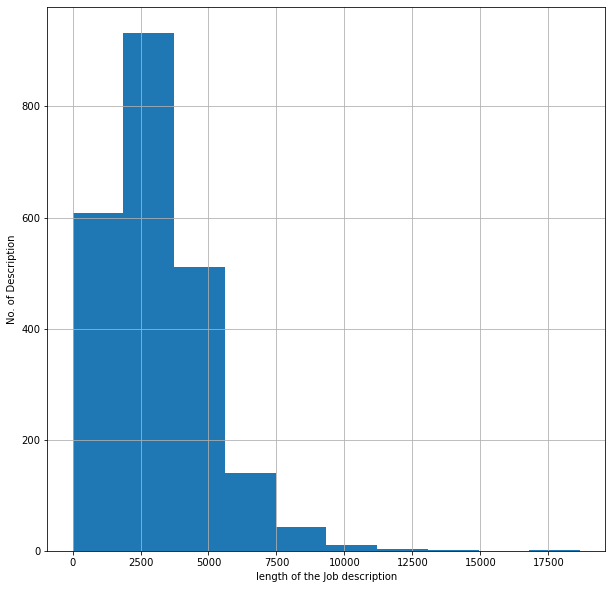

In [58]:
plt.figure(figsize=(10,10))
df['Desc_len'].hist()
plt.xlabel('length of the Job description')
plt.ylabel('No. of Description')

/Users/rahulkosamkar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'State')

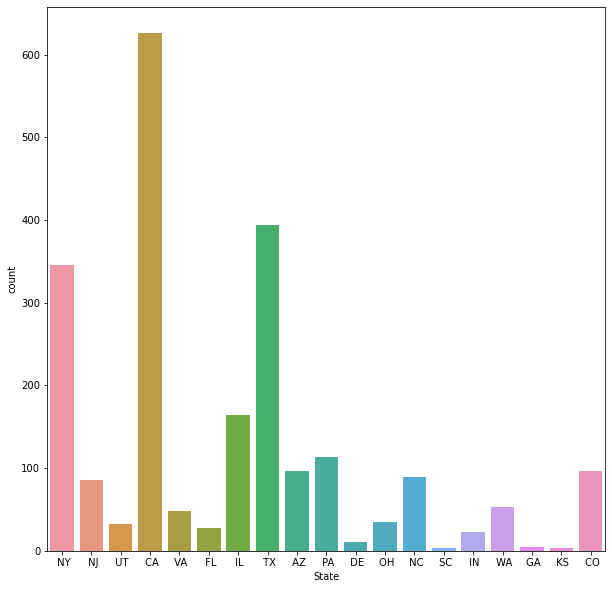

In [59]:
plt.figure(figsize=(10,10))
sns.countplot(df['State'])
plt.xlabel('State')

/Users/rahulkosamkar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Location')

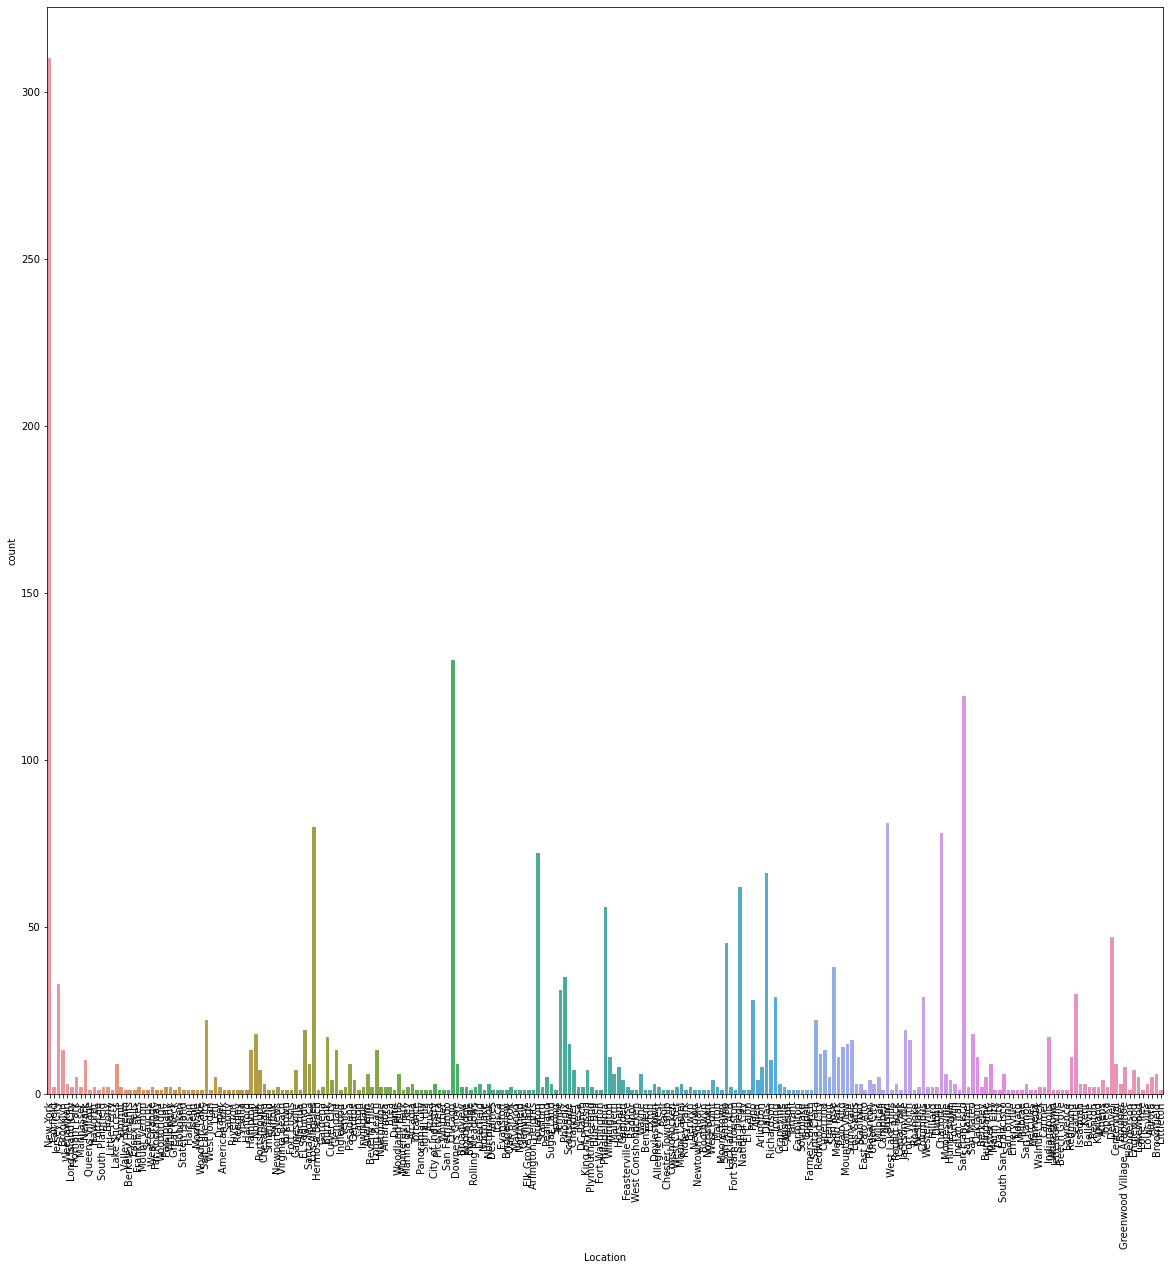

In [60]:
plt.figure(figsize=(20,20))
sns.countplot(df['Location'])
plt.xticks(rotation=90)
plt.xlabel('Location')

/Users/rahulkosamkar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'HQ_State')

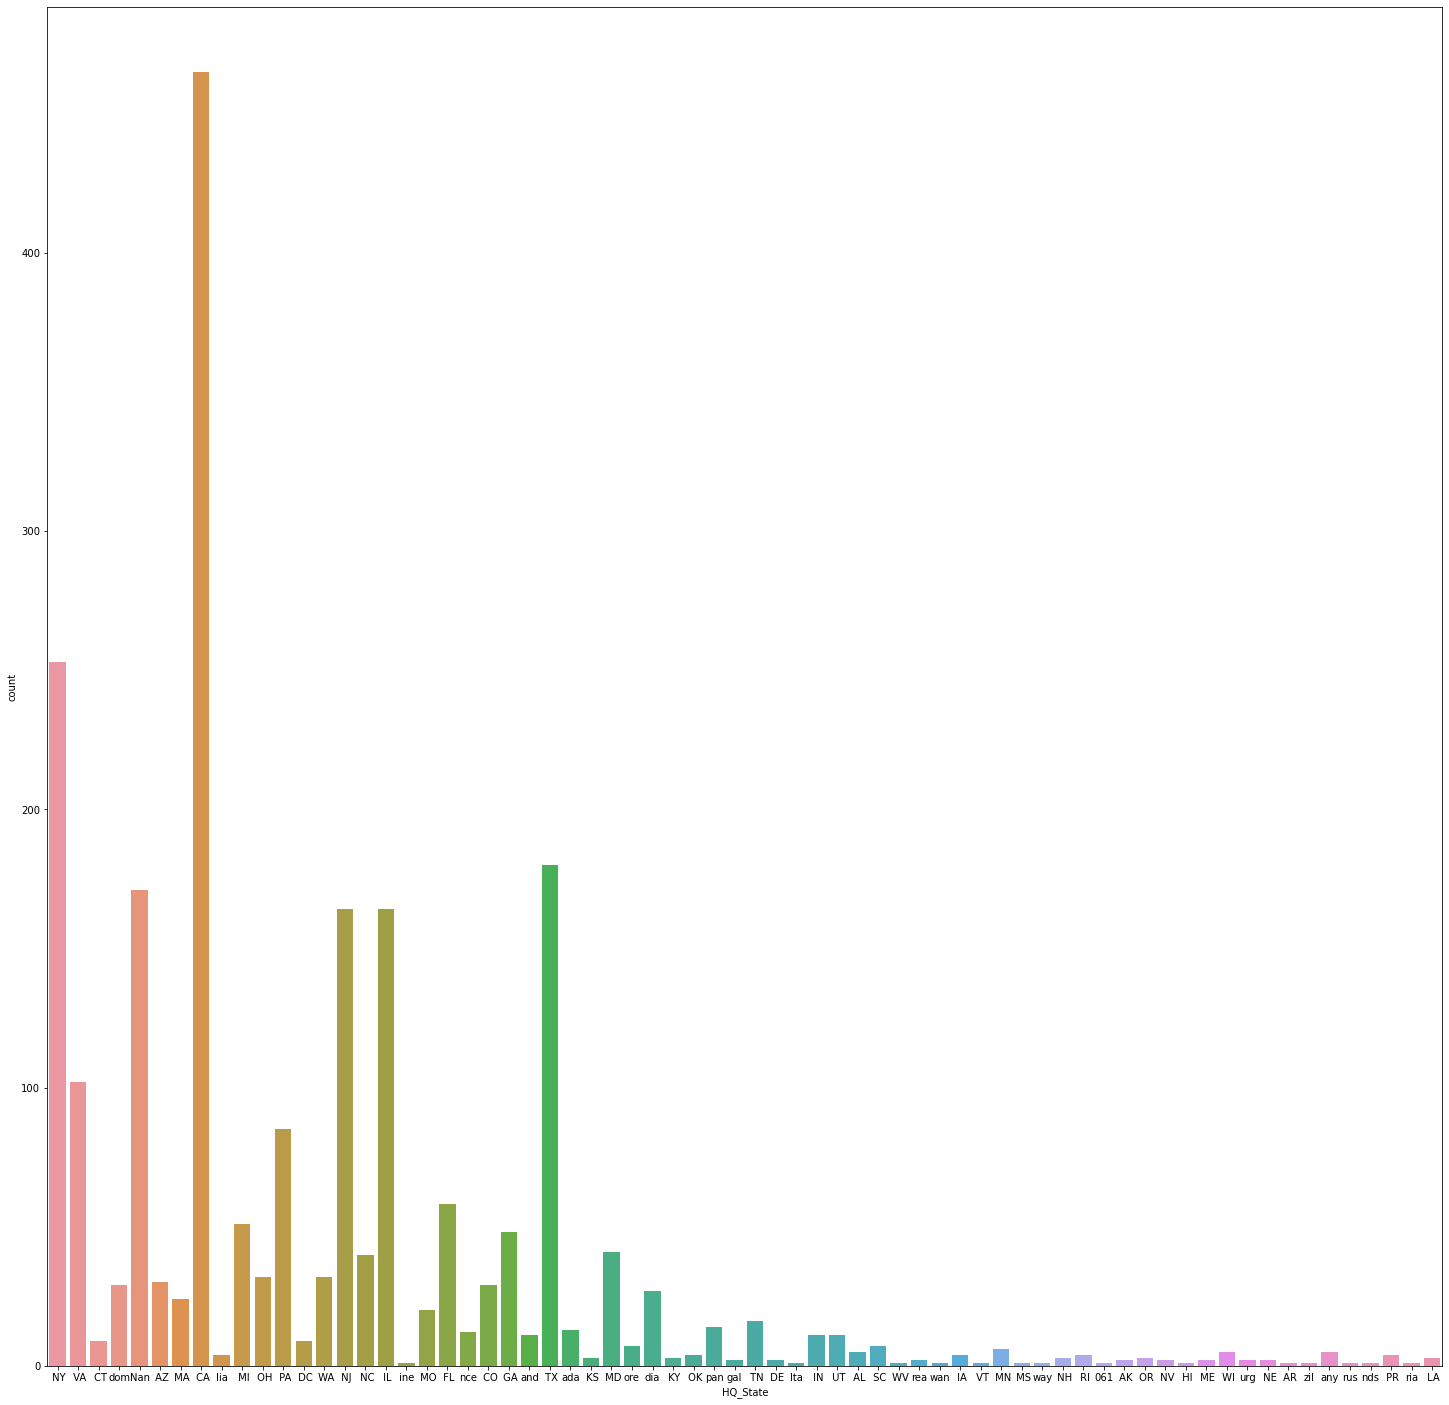

In [61]:
plt.figure(figsize=(25,25))
sns.countplot(df['HQ_State'])
plt.xlabel('HQ_State')

/Users/rahulkosamkar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Founded')

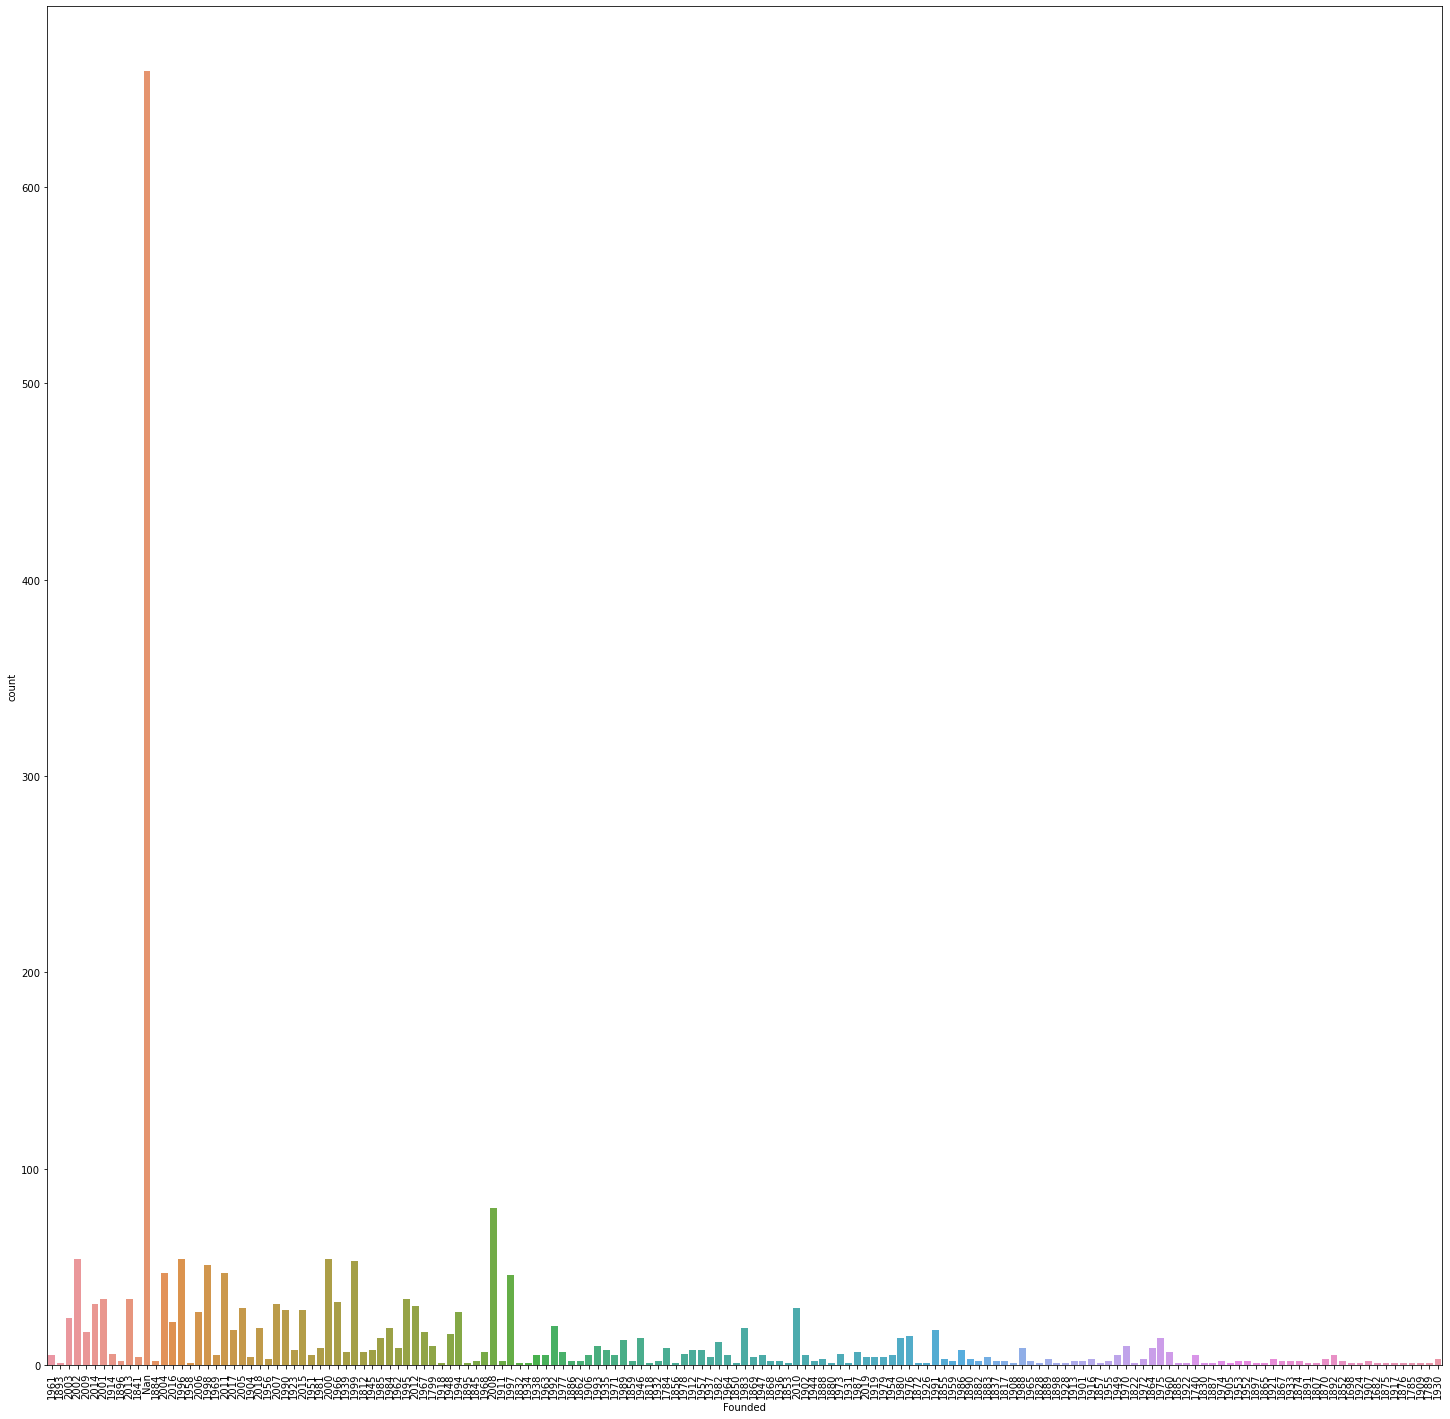

In [62]:
plt.figure(figsize=(25,25))
sns.countplot(df['Founded'])
plt.xticks(rotation=90)
plt.xlabel('Founded')

/Users/rahulkosamkar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'same_State')

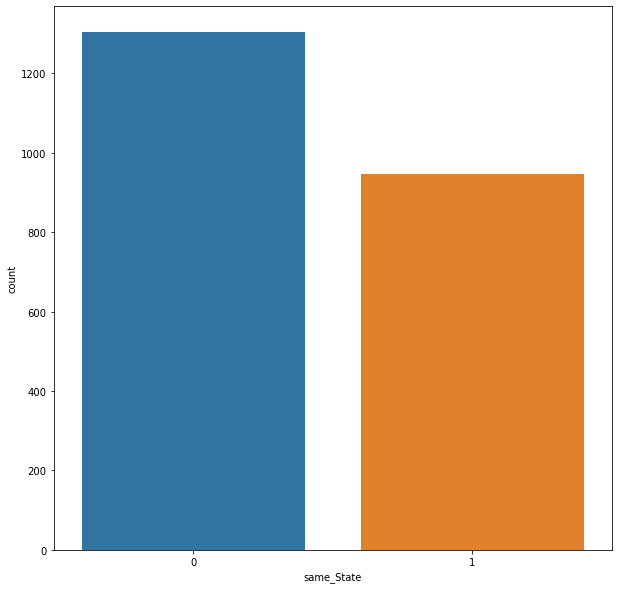

In [63]:
plt.figure(figsize=(10,10))
sns.countplot(df['Same_State'])
plt.xlabel('same_State')

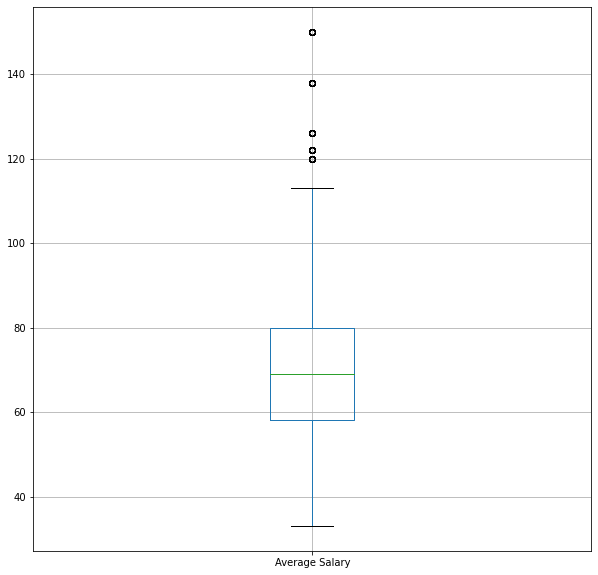

In [64]:
plt.figure(figsize=(10,10))
df.boxplot(column=['Average Salary'])
plt.show()

<AxesSubplot:xlabel='Job Title'>

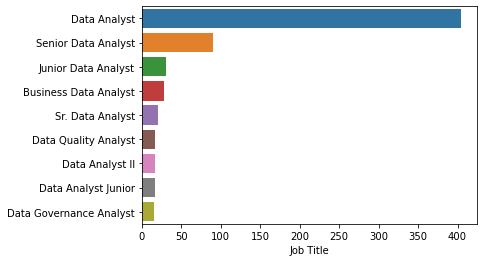

In [65]:
sns.barplot(x=df['Job Title'].value_counts()[0:9],y=df['Job Title'].value_counts()[0:9].index)

<AxesSubplot:xlabel='Location'>

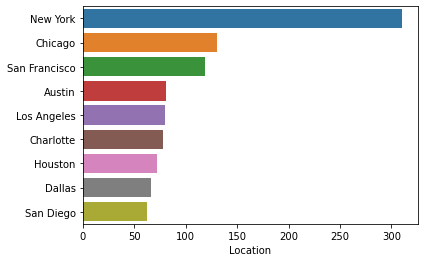

In [66]:
sns.barplot(x=df['Location'].value_counts()[0:9],y=df['Location'].value_counts()[0:9].index)

/Users/rahulkosamkar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'No.of Companies')

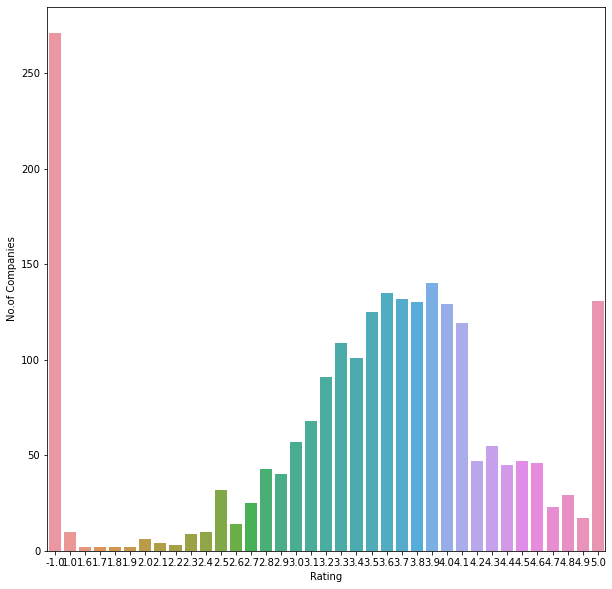

In [67]:
plt.figure(figsize=(10,10))
sns.countplot(df['Rating'])
plt.xlabel('Rating')
plt.ylabel('No.of Companies')

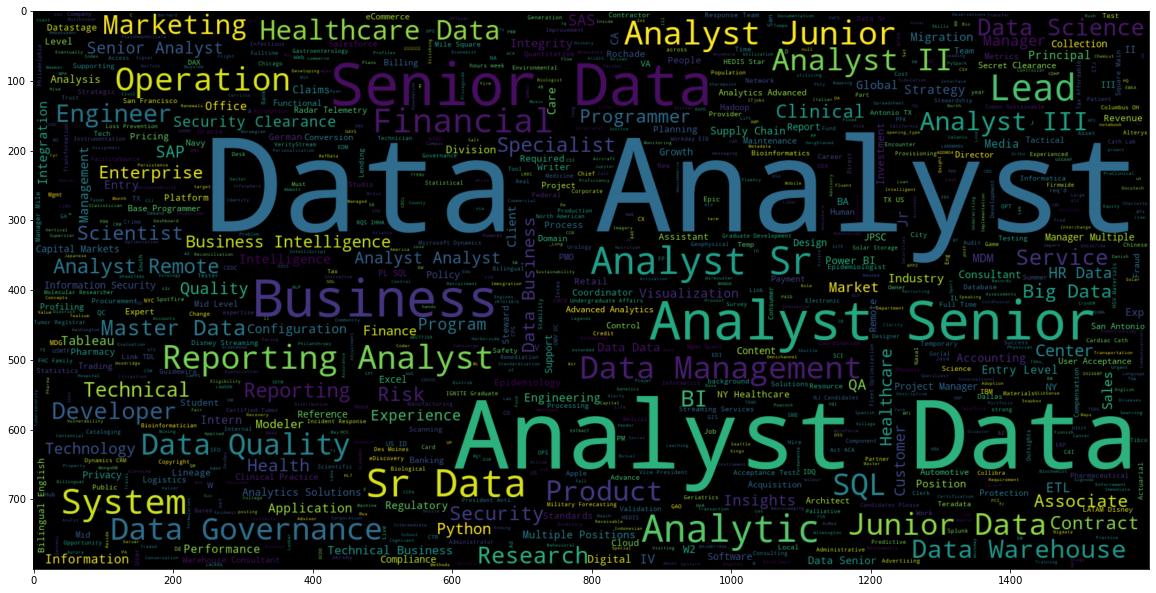

In [68]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df['Job Title']))
plt.imshow(wc , interpolation = 'bilinear')

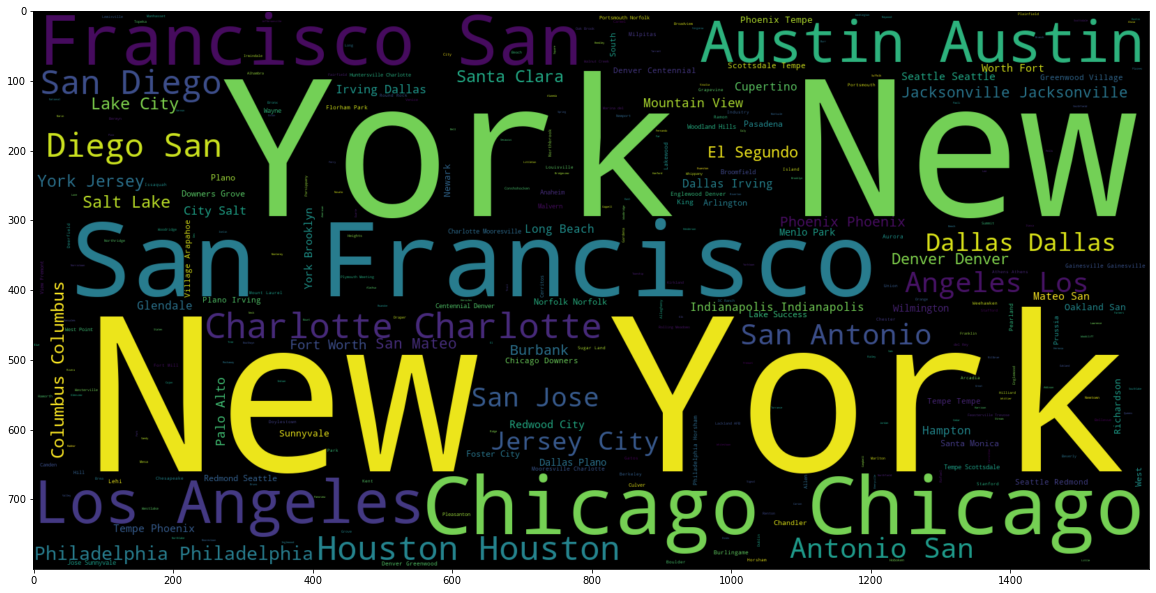

In [69]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df['Location']))
plt.imshow(wc , interpolation = 'bilinear')

In [71]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rahulkosamkar/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

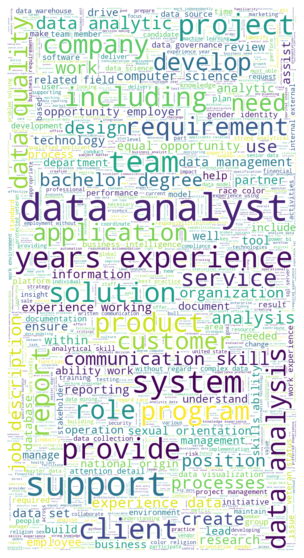

In [72]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

/Users/rahulkosamkar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'No.of Companies')

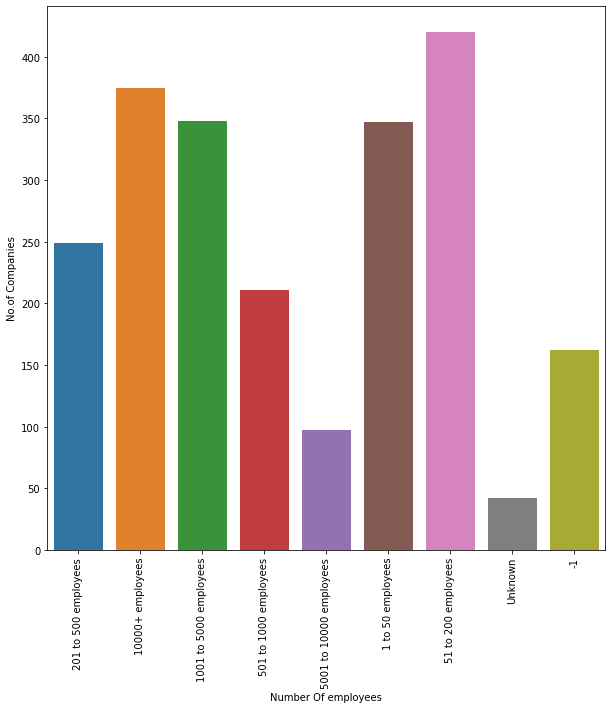

In [73]:
plt.figure(figsize=(10,10))
sns.countplot(df['Size'])
plt.xticks(rotation=90)
plt.xlabel('Number Of employees')
plt.ylabel('No.of Companies')

In [74]:
cor = df[['Average Salary', 'Rating','Desc_len']].corr()

<AxesSubplot:>

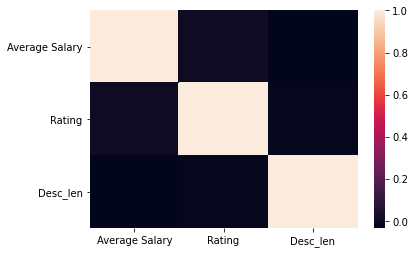

In [75]:
sns.heatmap(cor)

In [76]:
pd.set_option('display.max_rows',None)

In [77]:
pd.pivot_table(df, index=['Jobs','Senior_Jobs'],values='Average Salary')

Average Salary
Jobs           Senior_Jobs                
data analyst   junior            62.742424
               nan               71.900239
               senior            75.182336
data scientist nan               62.888889
               senior            84.400000
de             nan               76.714286
               senior            63.500000
manager        nan               87.500000
nan            junior            66.142857
               nan               70.461538
               senior            71.938596

In [78]:
pd.pivot_table(df, index=['Location'],values='Average Salary').sort_values('Average Salary', ascending = False)

Average Salary
Location                                   
Daly City                        126.000000
Marin City                       126.000000
Los Gatos                        122.666667
Whittier                         122.000000
Pico Rivera                      122.000000
Berkeley                         115.000000
Glenview                         113.000000
Northfield                       113.000000
Elk Grove Village                113.000000
Maywood                          113.000000
San Jose                         108.763158
Woodbridge                       106.000000
Great Neck                       106.000000
Hoboken                          106.000000
Cupertino                        105.769231
City of Industry                 105.666667
West Orange                      105.000000
Santa Clara                      104.454545
Secaucus                         104.000000
Far Rockaway                     104.000000
Sunnyvale                        102.687500
Menlo Park                       101.727273
Gardena                          100.500000
Arcadia                           99.333333
San Bruno                         99.000000
Emeryville                        99.000000
Novato                            99.000000
National City                     99.000000
San Francisco                     98.974790
Spring                            98.000000
Stanford                          98.000000
Redwood City                      96.916667
Fremont                           96.800000
Rolling Meadows                   96.000000
Palo Alto                         93.714286
Oakland                           92.545455
Hercules                          92.000000
El Cajon                          92.000000
Millbrae                          92.000000
Florham Park                      91.800000
San Diego                         91.419355
Woodland Hills                    91.166667
San Mateo                         90.777778
Mountain View                     90.066667
Deerfield                         89.666667
Campbell                          89.000000
Whippany                          89.000000
Parsippany                        89.000000
Boothwyn                          88.000000
Newtown Square                    88.000000
Norristown                        88.000000
Burlingame                        87.000000
Valley Stream                     87.000000
Long Island City                  86.500000
Newark                            86.100000
Sugar Land                        85.666667
Foster City                       85.222222
Broomfield                        83.166667
Aurora                            81.600000
Brea                              81.000000
Fort Sam Houston                  81.000000
Burbank                           80.705882
Long Beach                        80.615385
Fort Eustis                       80.000000
West Point                        79.500000
Marlton                           79.500000
Manhasset                         79.500000
Centennial                        79.333333
Burr Ridge                        79.000000
Des Plaines                       79.000000
Inglewood                         79.000000
Itasca                            79.000000
Northlake                         79.000000
Hermosa Beach                     79.000000
Chicago                           78.492308
Kirkland                          78.000000
Littleton                         78.000000
Pearland                          77.600000
Pleasanton                        77.000000
Arlington Heights                 77.000000
Northridge                        76.500000
South San Francisco               76.333333
Louisville                        75.333333
Milpitas                          74.400000
Union City                        74.000000
Lake Success                      73.666667
Santa Monica                      73.555556
Plymouth Meeting                  73.500000
Camden                            73.500000
Signal Hill              

In [79]:
pd.pivot_table(df, index=['State'],values='Average Salary').sort_values('Average Salary', ascending = False)

Average Salary
State                
 CA         88.250799
 IL         78.085366
 CO         73.364583
 NJ         72.744186
 NY         71.142029
 AZ         70.432990
 SC         68.000000
 NC         67.876404
 VA         65.000000
 WA         64.754717
 PA         61.342105
 DE         59.363636
 TX         58.456853
 FL         51.851852
 KS         51.000000
 IN         47.000000
 OH         45.200000
 GA         44.000000
 UT         37.090909

In [80]:
pd.pivot_table(df, index=['State','Jobs'],values='Average Salary',aggfunc ='count').sort_values('State', ascending = False)

Average Salary
State Jobs                          
 WA   nan                         10
      data analyst                43
 VA   nan                         18
      data analyst                30
 UT   nan                          4
      de                           1
      data scientist               1
      data analyst                27
 TX   de                           2
      data scientist               3
      data analyst               269
      nan                        120
 SC   data analyst                 3
 PA   nan                         20
      manager                      1
      de                           1
      data analyst                92
 OH   nan                          7
      data scientist               2
      data analyst                26
 NY   nan                        102
      manager                      1
      data scientist               2
      data analyst               240
 NJ   nan                         27
      data scientist               1
      data analyst                58
 NC   nan                         26
      de                           1
      data analyst                62
 KS   nan                          1
      data analyst                 2
 IN   data analyst                23
 IL   data analyst               130
      nan                         30
      de                           2
      data scientist               2
 GA   data analyst                 4
 FL   nan                          8
      data analyst                19
 DE   nan                          4
      data analyst                 7
 CO   nan                         28
      data analyst                68
 CA   data analyst               496
      nan                        119
      manager                      4
      de                           4
      data scientist               3
 AZ   nan                         26
      data analyst                71

In [81]:
pd.pivot_table(df, index=['Location','Jobs'],values='Average Salary').sort_values('Location', ascending = False)

Average Salary
Location                    Jobs                          
Yorktown                    nan                  56.000000
Woodridge                   data analyst         68.000000
Woodland Hills              nan                  54.000000
                            data analyst        109.750000
Woodcliff Lake              nan                  72.000000
Woodbridge                  nan                 106.000000
Wilmington                  nan                  66.500000
                            data analyst         55.285714
Whittier                    data analyst        122.000000
Whitestown                  data analyst         47.000000
Whippany                    data analyst         89.000000
Westlake                    nan                  51.000000
                            data analyst         63.000000
Westerville                 data analyst         53.000000
West Point                  data analyst         79.500000
West Orange                 data analyst        105.000000
West Lake Hills             data analyst         38.000000
West Jordan                 data analyst         36.000000
West Conshohocken           data analyst         53.000000
West Chester                data analyst         40.000000
Weehawken                   data scientist       66.000000
                            data analyst         59.000000
                            nan                  85.000000
Wayne                       nan                  67.250000
                            data analyst         70.500000
Walnut Creek                nan                  60.000000
Visalia                     data analyst         64.000000
Virginia Beach              data analyst         56.000000
Venice                      data analyst         66.500000
Valley Stream               data analyst         87.000000
Union City                  data analyst         74.000000
Torrance                    data analyst         54.000000
Topeka                      data analyst         51.000000
Tempe                       nan                  71.111111
                            data analyst         68.818182
Tarrant                     nan                  63.000000
Sunnyvale                   nan                  79.250000
                            manager              98.000000
                            data analyst        111.636364
Summit                      data analyst         69.500000
Sugar Land                  nan                  61.000000
                            data analyst         98.000000
Suffolk                     data analyst         56.000000
Staten Island               nan                  72.000000
Stanford                    data analyst         98.000000
Stafford                    data analyst         33.000000
Spring                      data analyst         98.000000
Southlake                   data analyst         63.000000
South San Francisco         nan                  70.666667
                            data analyst         82.000000
South Plainfield            data analyst         62.000000
Smithfield                  nan                  56.000000
Signal Hill                 data analyst         73.000000
Secaucus                    nan                 104.000000
Seattle                     nan                  67.200000
                            data analyst         63.960000
Scottsdale                  nan                  64.500000
                            data analyst         71.363636
Santa Monica                nan                  40.000000
                            data analyst         77.750000
Santa Clara                 nan                  79.666667
                            de                   98.000000
                            data scientist      120.000000
                            data analyst        108.294118
Sandy                       data analyst         36.000000
San Ramon                   data analyst         72.666667
San Rafael                  nan 

In [82]:
pd.pivot_table(df, index=['HQ_State'],values='Average Salary').sort_values('Average Salary', ascending = False)

Average Salary
HQ_State                
zil           150.000000
wan           122.000000
 NV           112.000000
061            98.000000
ria            92.000000
urg            88.000000
 PR            87.500000
 KY            86.000000
 CA            82.787097
gal            82.500000
 LA            82.333333
 IA            81.000000
rea            80.000000
 ME            78.500000
nds            78.000000
 VT            77.000000
 AK            77.000000
 NJ            76.957317
 OR            76.666667
 WI            76.400000
 MI            76.333333
ore            75.285714
 TN            75.000000
 MA            74.000000
Nan            72.877193
 GA            72.062500
nce            72.000000
 MD            71.512195
 AZ            70.800000
 WA            70.437500
 MO            70.300000
 OK            70.250000
 IL            70.158537
dia            70.111111
 CO            70.034483
 RI            70.000000
 DC            69.555556
dom            69.413793
 VA            68.049020
 KS            68.000000
 HI            68.000000
 NY            67.976285
pan            67.857143
 DE            67.000000
 NC            66.300000
ine            66.000000
any            65.600000
 NE            65.500000
 FL            64.137931
 TX            62.827778
 PA            62.752941
 MN            61.666667
 AR            61.000000
 AL            60.800000
 OH            59.812500
 CT            59.666667
ada            59.384615
 NH            59.000000
rus            59.000000
and            58.545455
lta            58.000000
 IN            56.090909
 SC            55.285714
 WV            53.000000
lia            52.000000
 UT            42.454545
way            33.000000
 MS            33.000000

In [83]:
pd.pivot_table(df, index=['HQ_State','Jobs'],values='Average Salary').sort_values('HQ_State', ascending = False)

Average Salary
HQ_State Jobs                          
zil      data analyst        150.000000
way      data analyst         33.000000
wan      data analyst        122.000000
urg      data analyst         88.000000
rus      data analyst         59.000000
ria      data analyst         92.000000
rea      data analyst         80.000000
pan      nan                  66.200000
         data analyst         68.777778
ore      nan                  60.666667
         data analyst         86.250000
nds      nan                  78.000000
nce      data analyst         75.300000
         nan                  75.000000
         data scientist       36.000000
lta      data analyst         58.000000
lia      data analyst         52.000000
ine      data analyst         66.000000
gal      nan                 106.000000
         data analyst         59.000000
dom      nan                  74.800000
         data scientist       72.000000
         data analyst         66.277778
dia      nan                  72.111111
         data analyst         69.111111
any      nan                  56.000000
         data analyst         80.000000
and      nan                  71.666667
         data analyst         53.625000
ada      data analyst         63.375000
         nan                  53.000000
Nan      data scientist       39.500000
         data analyst         73.384058
         nan                  71.933333
         manager              98.000000
061      data analyst         98.000000
 WV      data analyst         53.000000
 WI      nan                  40.000000
         de                   88.000000
         data analyst         84.666667
 WA      nan                  70.285714
         data analyst         70.480000
 VT      nan                  77.000000
 VA      nan                  72.322581
         manager              95.500000
         data analyst         65.333333
 UT      nan                  38.000000
         data analyst         43.444444
 TX      de                   70.500000
         data analyst         62.387597
         nan                  63.673469
 TN      nan                  81.500000
         de                   68.000000
         data analyst         74.538462
 SC      nan                  38.000000
         data analyst         58.166667
 RI      nan                  79.500000
         data analyst         60.500000
 PR      data analyst         87.500000
 PA      nan                  65.444444
         data scientist       77.000000
         data analyst         61.803030
 OR      data analyst         78.000000
         nan                  76.000000
 OK      data analyst         70.250000
 OH      nan                  61.888889
         data analyst         59.000000
 NY      nan                  66.923077
         data scientist       69.000000
         data analyst         68.439306
 NV      nan                  74.000000
         data analyst        150.000000
 NJ      nan                  76.918919
         data analyst         76.968504
 NH      data analyst         59.000000
 NE      data analyst         65.500000
 NC      data analyst         64.681818
         nan                  69.750000
         de                   56.500000
 MS      data analyst         33.000000
 MO      nan                  38.000000
         data analyst         72.000000
 MN      nan                  62.000000
         data analyst         61.600000
 MI      nan                  85.500000
         data analyst         73.512821
 ME      data analyst         78.500000
 MD      nan                  70.900000
         data analyst         71.709677
 MA      nan                  64.875000
         data analyst         78.562500
 LA      nan                  78.000000
         data analyst         84.500000
 KY      nan                  60.000000
         data analyst        138.000000
 KS      data analyst         66.000000
         nan                  72.000000
 IN      nan                  89.000000
         data analyst    

In [84]:
pd.pivot_table(df[df['Jobs']=='data scientist'], index='State',values='Average Salary').sort_values('State', ascending = False)

Average Salary
State                
 UT         36.000000
 TX         38.333333
 OH         40.000000
 NY         72.000000
 NJ         66.000000
 IL         95.000000
 CA        119.000000

In [85]:
pd.pivot_table(df[df['Jobs']=='data scientist'], index='HQ_State',values='Average Salary').sort_values('HQ_State', ascending = False)

Average Salary
HQ_State                
nce            36.000000
dom            72.000000
Nan            39.500000
 PA            77.000000
 NY            69.000000
 IL            64.333333
 GA            36.000000
 CA           119.000000

In [86]:
pd.pivot_table(df[df['Jobs']=='data analyst'], index='State',values='Average Salary').sort_values('State', ascending = False)

Average Salary
State                
 WA         63.558140
 VA         64.000000
 UT         36.666667
 TX         56.527881
 SC         68.000000
 PA         61.358696
 OH         45.000000
 NY         69.612500
 NJ         73.896552
 NC         68.370968
 KS         51.000000
 IN         47.000000
 IL         76.707692
 GA         44.000000
 FL         52.315789
 DE         55.285714
 CO         71.647059
 CA         90.604839
 AZ         70.380282

In [87]:
pd.pivot_table(df[df['Jobs']=='data analyst'], index='HQ_State',values='Average Salary').sort_values('HQ_State', ascending = False)

Average Salary
HQ_State                
zil           150.000000
way            33.000000
wan           122.000000
urg            88.000000
rus            59.000000
ria            92.000000
rea            80.000000
pan            68.777778
ore            86.250000
nce            75.300000
lta            58.000000
lia            52.000000
ine            66.000000
gal            59.000000
dom            66.277778
dia            69.111111
any            80.000000
and            53.625000
ada            63.375000
Nan            73.384058
061            98.000000
 WV            53.000000
 WI            84.666667
 WA            70.480000
 VA            65.333333
 UT            43.444444
 TX            62.387597
 TN            74.538462
 SC            58.166667
 RI            60.500000
 PR            87.500000
 PA            61.803030
 OR            78.000000
 OK            70.250000
 OH            59.000000
 NY            68.439306
 NV           150.000000
 NJ            76.968504
 NH            59.000000
 NE            65.500000
 NC            64.681818
 MS            33.000000
 MO            72.000000
 MN            61.600000
 MI            73.512821
 ME            78.500000
 MD            71.709677
 MA            78.562500
 LA            84.500000
 KY           138.000000
 KS            66.000000
 IN            48.777778
 IL            69.023077
 IA            81.000000
 HI            68.000000
 GA            70.000000
 FL            64.309524
 DE            67.000000
 DC            71.000000
 CT            59.750000
 CO            69.695652
 CA            84.717087
 AZ            70.761905
 AR            61.000000
 AL            59.000000

In [88]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Min Salary', 'Max Salary', 'Average Salary', 'State', 'HQ_State',
       'Same_State', 'Jobs', 'Senior_Jobs', 'num_comp', 'Desc_len'],
      dtype='object')

In [89]:
df_model = df[['Average Salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp',
             'State','Same_State','Jobs','Senior_Jobs','Desc_len']]

# get dummy data 
dum = pd.get_dummies(df_model)

In [90]:
dum

Average Salary  Rating  num_comp  Same_State  Desc_len  Size_-1  \
0                 51     3.2         0           1      7057        0   
1                 51     3.8         0           1      4702        0   
2                 51     3.4         1           1      4688        0   
3                 51     4.1         0           0      5249        0   
4                 51     3.9         1           1      3376        0   
5                 51     3.9         0           0      2611        0   
6                 51     4.4         0           1      3143        0   
7                 51     3.7         3           1      1639        0   
8                 51     4.0         3           0      3342        0   
9                 51     4.4         2           1      3468        0   
10                51     4.0         2           1      4619        0   
11                51    -1.0         0           0      5625        0   
12                51     3.7         0           1      3242        0   
13                51     3.0         0           1      2960        0   
14                51     3.4         0           0      3723        0   
15                51     3.6         0           1      2401        0   
16                51     3.8         3           1      2550        0   
17                51     3.8         3           1      3889        0   
18                51     3.9         0           0      4149        0   
19                51     4.9         0           1      4465        0   
20                51     4.4         3           0      3213        0   
21                51    -1.0         0           0       816        0   
22                51     3.3         3           0      2927        0   
23                51     3.5         0           0      3479        0   
24                51     3.8         0           0      1129        0   
25                51     4.0         0           0      1959        0   
26                51     5.0         0           0      2951        0   
27                51     4.8         0           1      4170        0   
28                51     3.7         0           1      3458        0   
29                51     4.7         0           0      3588        0   
30                66     3.6         0           0      2719        0   
31                66     3.6         0           0       255        0   
32                66     3.5         0           0       462        0   
33                66     3.2         0           0      4384        0   
34                66    -1.0         0           0      2158        1   
35                66     3.7         0           0      2952        0   
36                66    -1.0         0           1      2896        0   
37                66     3.6         0           0      3288        0   
38                66     4.0         2           1      4967        0   
39                66     4.6         0           0      3747        0   
40                66    -1.0         0           1      5662        0   
41                66    -1.0         0           0      2718        0   
42                66     5.0         0           0      1795        0   
43                66     4.0         0           0      1095        0   
44                66     3.0         3           1      5916        0   
45                66     2.9         0           0      2432        0   
46                66     4.0         0           0      2091        0   
47                66     3.6         3           1      4851        0   
48                66     4.9         0           1      2197        0   
49                66     3.9         0           0      2134        0   
50                66     4.0         3           0      5534        0   
51                66     3.8         3           0      3274        0   
52                66     3.7         3           0      6119        0   
53                66     3.6         0           1      3752    

In [91]:
X = dum.drop('Average Salary', axis =1)
y = dum['Average Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [92]:

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Average Salary   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     6.964
Date:                Wed, 14 Jul 2021   Prob (F-statistic):          1.64e-102
Time:                        15:17:20   Log-Likelihood:                -9861.6
No. Observations:                2251   AIC:                         2.002e+04
Df Residuals:                    2101   BIC:                         2.088e+04
Df Model:                         149                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 31.9663      2.116     15.110      0.000      27.818      36.115
Rating                                                 0.2283      0.424      0.539      0.590      -0.603       1.059
num_comp                                              -0.9389      0.457     -2.056      0.040      -1.834      -0.043
Same_State                                            -0.5854      1.097     -0.534      0.594      -2.736       1.565
Desc_len                                              -0.0005      0.000     -1.842      0.066      -0.001    3.22e-05
Size_-1                                                3.5418      1.015      3.490      0.000       1.552       5.532
Size_1 to 50 employees                                 1.6514      1.558      1.060      0.289      -1.404       4.707
Size_10000+ employees                                  4.1002      1.884      2.176      0.030       0.405       7.796
Size_1001 to 5000 employees                            5.8940      1.372      4.297      0.000       3.204       8.584
Size_201 to 500 employees                              1.8411      1.482      1.242      0.214      -1.065       4.747
Size_5001 to 10000 employees                           5.3671      2.212      2.426      0.015       1.029       9.705
Size_501 to 1000 employees                             3.1553      1.593      1.981      0.048       0.032       6.278
Size_51 to 200 employees                               4.2281      1.318      3.209      0.001       1.644       6.812
Size_Unknown                                           2.1873      3.133      0.698      0.485      -3.956       8.331
Type of ownership_-1                                   3.5418      1.015      3.490      0.000       1.552       5.532
Type of ownership_College / University                12.9892      6.978      1.862      0.063      -0.695      26.673
Type of ownership_Company - Private                    1.7369      2.298      0.756      0.450      -2.769       6.243
Type of ownership_Company - Public                     2.5465      2.508      1.015      0.310      -2.372       7.465
Type of ownership_Contract                             4.7760      6.090      0.784      0.433      -7.167      16.719
Type of ownership_Franchise                            1.0368     14.815      0.070      0.944     -28.018      30.091
Type of ownership_Government                          -4.1031      6.223     -0.659      0.510     -16.307       8.100
Type of ownership_Hospital                             6.9977      5.228      1.338      0.181      -3.255      17.251
Type of ownership_Nonprofit Organization               0.0832      2.928      0.028      0.977      -5.658  

In [93]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
# mean = mean_absolute_error(y_train,y_pred) 
np.mean(cross_val_score(lm,X_train,y_train,scoring ='neg_mean_absolute_error', cv = 3))
# score = lm.score(X_train,y_train)

-41701359.30376073

In [94]:
log = LogisticRegression()
log.fit(X_train,y_train)
np.mean(cross_val_score(log,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

# score = log.score(X_train,y_train)
# acc = accuracy_score(y_train,y_pred)

/Users/rahulkosamkar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rahulkosamkar/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
/Users/rahulkosamkar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In

-20.082539682539686

In [95]:
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
y_pred1 = lm_l.predict(X_test)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))


-15.225646228772364

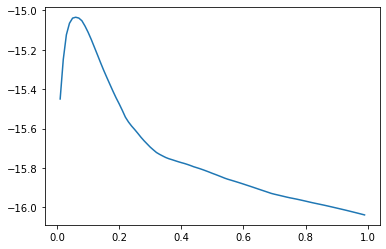

In [96]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)


In [97]:
ran = RandomForestRegressor()
ran.fit(X_train,y_train)
y_pred3 = ran.predict(X_test)
np.mean(cross_val_score(ran,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))


-15.541892335600906

In [98]:
rand = RandomForestClassifier()
ran.fit(X_train,y_train)
np.mean(cross_val_score(rand,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

/Users/rahulkosamkar/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


-18.951111111111114

In [99]:
parameters = {'n_estimators':range(10,30,3), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}
gd = GridSearchCV(ran,parameters, scoring = 'neg_mean_absolute_error', cv = 3)
gd.fit(X_train,y_train)
gd.best_score_


-15.479593650793651

In [100]:
gd.best_estimator_

RandomForestRegressor(criterion='mae', max_features='sqrt', n_estimators=25)

In [101]:
parameters1 = {'alpha':[0.001, 0.002, 0.005, 0.06, 0.003]}
gd1 = GridSearchCV(lm_l,parameters1, scoring = 'neg_mean_absolute_error', cv = 3)
gd1.fit(X_train,y_train)
y_pred2 = gd1.predict(X_test)
gd1.best_score_


/Users/rahulkosamkar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 418.4303379342891, tolerance: 58.52022514285716
  model = cd_fast.enet_coordinate_descent(


-15.035153171929949

In [102]:
gd1.best_estimator_

Lasso(alpha=0.06)

In [103]:
lm1 = mean_absolute_error(y_test,y_pred)
lm1

17273421.38913531

In [104]:
lm_l1 = mean_absolute_error(y_test,y_pred1)
lm_l1

15.956893897760464

In [105]:
gd_1 = mean_absolute_error(y_test,y_pred2)
gd_1

15.866489419480384

In [106]:
ran1 = mean_absolute_error(y_test,y_pred3)
ran1

15.87465950502489